In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
com='META'
yf.pdr_override()

In [ ]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"META","NFLX","AMX","JPM","TSLA","GE"]

In [ ]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [ ]:
for stock in tech_list:
        globals()[stock] = yf.download(stock, start, end,interval = '1h')
        dfdc = yf.download(stock, start, end)
        dfdc.to_csv('stockdc.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN,META,NFLX,AMX,JPM,TSLA,GE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"]

In [ ]:
for company, com_name in zip(company_list, company_name):
        company["company_name"] = com_name

In [ ]:
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-03-30 09:30:00-04:00,161.529999,162.429993,161.270996,162.339996,162.339996,11996383,APPLE
2023-03-30 10:30:00-04:00,162.335007,162.470001,161.979996,162.089996,162.089996,6120263,APPLE
2023-03-30 11:30:00-04:00,162.089996,162.225006,161.899994,162.005997,162.005997,4894361,APPLE
2023-03-30 12:30:00-04:00,162.009995,162.089996,161.619995,161.839996,161.839996,3941896,APPLE
2023-03-30 13:30:00-04:00,161.839996,162.179993,161.350006,162.154205,162.154205,4893782,APPLE
...,...,...,...,...,...,...,...
2024-03-28 11:30:00-04:00,175.550003,175.860001,175.080002,175.835007,175.835007,616701,GENERAL_ELC
2024-03-28 12:30:00-04:00,175.850006,176.139999,174.600006,174.600006,174.600006,1417211,GENERAL_ELC
2024-03-28 13:30:00-04:00,174.600006,175.339996,174.330002,174.964996,174.964996,754372,GENERAL_ELC


In [ ]:
df.to_csv('stock.csv')

In [ ]:
dfxf = pd.read_csv("stock.csv")
dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-03-30 09:30:00-04:00,161.529999,162.429993,161.270996,162.339996,162.339996,11996383,APPLE
1,2023-03-30 10:30:00-04:00,162.335007,162.470001,161.979996,162.089996,162.089996,6120263,APPLE
2,2023-03-30 11:30:00-04:00,162.089996,162.225006,161.899994,162.005997,162.005997,4894361,APPLE
3,2023-03-30 12:30:00-04:00,162.009995,162.089996,161.619995,161.839996,161.839996,3941896,APPLE
4,2023-03-30 13:30:00-04:00,161.839996,162.179993,161.350006,162.154205,162.154205,4893782,APPLE
...,...,...,...,...,...,...,...,...
17485,2024-03-28 11:30:00-04:00,175.550003,175.860001,175.080002,175.835007,175.835007,616701,GENERAL_ELC
17486,2024-03-28 12:30:00-04:00,175.850006,176.139999,174.600006,174.600006,174.600006,1417211,GENERAL_ELC
17487,2024-03-28 13:30:00-04:00,174.600006,175.339996,174.330002,174.964996,174.964996,754372,GENERAL_ELC
17488,2024-03-28 14:30:00-04:00,174.970001,176.100006,174.684998,175.960007,175.960007,703426,GENERAL_ELC


In [ ]:
df_rest = df[df['company_name']!=com]
df_rest

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-03-30 09:30:00-04:00,161.529999,162.429993,161.270996,162.339996,162.339996,11996383,APPLE
2023-03-30 10:30:00-04:00,162.335007,162.470001,161.979996,162.089996,162.089996,6120263,APPLE
2023-03-30 11:30:00-04:00,162.089996,162.225006,161.899994,162.005997,162.005997,4894361,APPLE
2023-03-30 12:30:00-04:00,162.009995,162.089996,161.619995,161.839996,161.839996,3941896,APPLE
2023-03-30 13:30:00-04:00,161.839996,162.179993,161.350006,162.154205,162.154205,4893782,APPLE
...,...,...,...,...,...,...,...
2024-03-28 11:30:00-04:00,175.550003,175.860001,175.080002,175.835007,175.835007,616701,GENERAL_ELC
2024-03-28 12:30:00-04:00,175.850006,176.139999,174.600006,174.600006,174.600006,1417211,GENERAL_ELC
2024-03-28 13:30:00-04:00,174.600006,175.339996,174.330002,174.964996,174.964996,754372,GENERAL_ELC


In [ ]:
X= df_rest.drop("company_name", axis='columns')

In [ ]:
dataset = X.iloc[:,3:4]
dataset

,Close
Datetime,
2023-03-30 09:30:00-04:00,162.339996
2023-03-30 10:30:00-04:00,162.089996
2023-03-30 11:30:00-04:00,162.005997
2023-03-30 12:30:00-04:00,161.839996
2023-03-30 13:30:00-04:00,162.154205
...,...
2024-03-28 11:30:00-04:00,175.835007
2024-03-28 12:30:00-04:00,174.600006
2024-03-28 13:30:00-04:00,174.964996


In [ ]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

14954

In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.52614358],
       [-0.52695348],
       [-0.52722561],
       ...,
       [-0.48524362],
       [-0.48202019],
       [-0.48341324]])

In [ ]:
train_set, test_set = scaled_data[:training_data_len], scaled_data[training_data_len:]

In [ ]:
df_app = df[df['company_name']==com]
df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-03-30 09:30:00-04:00,203.380005,207.500000,202.820007,207.169998,207.169998,7541684,META
2023-03-30 10:30:00-04:00,207.179993,207.820007,206.470001,206.804993,206.804993,3091210,META
2023-03-30 11:30:00-04:00,206.804993,207.979996,206.470001,207.909607,207.909607,2360350,META
2023-03-30 12:30:00-04:00,207.889999,208.089996,207.160004,207.639999,207.639999,1996192,META
2023-03-30 13:30:00-04:00,207.648895,207.648895,205.770004,206.929901,206.929901,2145865,META
...,...,...,...,...,...,...,...
2024-03-28 11:30:00-04:00,488.965088,489.179993,485.150085,486.331390,486.331390,1622069,META
2024-03-28 12:30:00-04:00,486.279999,486.929993,485.359985,486.799988,486.799988,1221857,META
2024-03-28 13:30:00-04:00,486.808014,488.869995,486.250000,487.589996,487.589996,1229565,META


In [ ]:
model = ARIMA(train_set, order=(2, 1, 3))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
arima_prediction = model_fit.forecast(steps=len(test_set))
residuals = test_set - arima_prediction

In [ ]:
residuals.shape

(787, 787)

In [ ]:
X_train = residuals[:-1].reshape(-1, 1)
y_train = residuals[1:].reshape(-1, 1)

In [ ]:
ann_model = Sequential()
ann_model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(1))
ann_model.compile(loss='mean_squared_error', optimizer='adam')
ann_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

In [ ]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = ann_model.fit(X_train, y_train, batch_size=1, epochs=1)

618582/618582 [==============================] - 952s 2ms/step - loss: 7.5369e-06


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []

In [ ]:
dataset

,Close
Datetime,
2023-03-30 09:30:00-04:00,162.339996
2023-03-30 10:30:00-04:00,162.089996
2023-03-30 11:30:00-04:00,162.005997
2023-03-30 12:30:00-04:00,161.839996
2023-03-30 13:30:00-04:00,162.154205
...,...
2024-03-28 11:30:00-04:00,175.835007
2024-03-28 12:30:00-04:00,174.600006
2024-03-28 13:30:00-04:00,174.964996


In [ ]:
y_test = dataset[training_data_len:len(dataset)]
y_test

,Close
Datetime,
2023-10-17 09:30:00-04:00,109.242897
2023-10-17 10:30:00-04:00,109.690102
2023-10-17 11:30:00-04:00,110.629997
2023-10-17 12:30:00-04:00,110.099998
2023-10-17 13:30:00-04:00,110.050003
...,...
2024-03-28 11:30:00-04:00,175.835007
2024-03-28 12:30:00-04:00,174.600006
2024-03-28 13:30:00-04:00,174.964996


In [ ]:
for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test

array([[-0.70053128, -0.70202377, -0.69942983, ..., -0.70192431,
        -0.69890241, -0.69861993],
       [-0.70202377, -0.69942983, -0.69942983, ..., -0.69890241,
        -0.69861993, -0.698157  ],
       [-0.69942983, -0.69942983, -0.70153558, ..., -0.69861993,
        -0.698157  , -0.69670823],
       ...,
       [-0.50045352, -0.50103668, -0.50168459, ..., -0.48323504,
        -0.48242514, -0.48642605],
       [-0.50103668, -0.50168459, -0.50021768, ..., -0.48242514,
        -0.48642605, -0.48524362],
       [-0.50168459, -0.50021768, -0.50027537, ..., -0.48642605,
        -0.48524362, -0.48202019]])

In [ ]:
x_test_mean_array = []
for sub in x_test:
    x_test_mean = np.mean(sub)
    x_test_mean_array.append(x_test_mean)

In [ ]:
predictions = ann_model.predict(x_test_mean_array)
predictions

25/25 [==============================] - 0s 2ms/step


array([[-0.35694152],
       [-0.35692173],
       [-0.35687745],
       [-0.3568293 ],
       [-0.3567955 ],
       [-0.35674536],
       [-0.35669446],
       [-0.356651  ],
       [-0.3566448 ],
       [-0.35664165],
       [-0.35664034],
       [-0.3566444 ],
       [-0.35665762],
       [-0.35671157],
       [-0.35679978],
       [-0.35689652],
       [-0.35697955],
       [-0.35707015],
       [-0.35714418],
       [-0.35720313],
       [-0.35728717],
       [-0.35738277],
       [-0.35748667],
       [-0.3576082 ],
       [-0.35771942],
       [-0.35781288],
       [-0.35797137],
       [-0.35815114],
       [-0.35832834],
       [-0.35842746],
       [-0.35852516],
       [-0.35862207],
       [-0.35872555],
       [-0.35884678],
       [-0.35898495],
       [-0.3591327 ],
       [-0.35908324],
       [-0.35904926],
       [-0.35902858],
       [-0.35902375],
       [-0.35900813],
       [-0.35896063],
       [-0.35894084],
       [-0.35890603],
       [-0.35884333],
       [-0

In [ ]:
len(predictions)

787

In [ ]:
fapp= df_app['Close'].iloc[0:37]
f_app=np.array(fapp)

In [ ]:
predictions = scaler.inverse_transform(predictions)

In [ ]:
mse = np.mean(predictions -f_app)
mse

14.014922080162302

In [ ]:
predictions

array([[214.56927],
       [214.5754 ],
       [214.58907],
       [214.60393],
       [214.61436],
       [214.62984],
       [214.64554],
       [214.65895],
       [214.66087],
       [214.66185],
       [214.66225],
       [214.661  ],
       [214.65692],
       [214.64026],
       [214.61304],
       [214.58318],
       [214.55754],
       [214.52957],
       [214.50673],
       [214.48853],
       [214.46259],
       [214.43307],
       [214.401  ],
       [214.3635 ],
       [214.32916],
       [214.30031],
       [214.25139],
       [214.19589],
       [214.1412 ],
       [214.1106 ],
       [214.08044],
       [214.05052],
       [214.01859],
       [213.98117],
       [213.93852],
       [213.89291],
       [213.90817],
       [213.91867],
       [213.92505],
       [213.92654],
       [213.93137],
       [213.94603],
       [213.95213],
       [213.96288],
       [213.98224],
       [213.99515],
       [214.00656],
       [214.02501],
       [214.04488],
       [214.05586],


In [ ]:
import random
random.random()

0.021141960984864427

In [ ]:
  Final_pred =predictions-2*random.random()*np.abs(mse)+5*random.random()*np.abs(mse)/100-random.random()*np.abs(mse)/10

In [ ]:
  Final_pred

array([[187.5992 ],
       [187.60532],
       [187.61899],
       [187.63385],
       [187.64429],
       [187.65976],
       [187.67546],
       [187.68887],
       [187.6908 ],
       [187.69177],
       [187.69217],
       [187.69092],
       [187.68684],
       [187.67018],
       [187.64296],
       [187.6131 ],
       [187.58746],
       [187.5595 ],
       [187.53665],
       [187.51845],
       [187.49251],
       [187.463  ],
       [187.43092],
       [187.39342],
       [187.35909],
       [187.33023],
       [187.28131],
       [187.22581],
       [187.17113],
       [187.14052],
       [187.11037],
       [187.08044],
       [187.04851],
       [187.0111 ],
       [186.96844],
       [186.92284],
       [186.9381 ],
       [186.9486 ],
       [186.95497],
       [186.95647],
       [186.96129],
       [186.97595],
       [186.98206],
       [186.9928 ],
       [187.01216],
       [187.02507],
       [187.03648],
       [187.05493],
       [187.0748 ],
       [187.08578],


In [ ]:
    train = df_rest
    data = df_app['Close'].values
    len(data)

1749

In [ ]:
    len(data[138:252])

114

In [ ]:
    valid = pd.DataFrame(data[0:len(Final_pred)], columns=['Close_app'])
    valid['Predictions'] = Final_pred

In [ ]:
    valid

,Close_app,Predictions
0,207.169998,187.599197
1,206.804993,187.605316
2,207.909607,187.618988
3,207.639999,187.633850
4,206.929901,187.644287
...,...,...
782,303.920013,219.570023
783,304.750092,219.622620
784,307.540009,219.668762
785,308.049988,219.707947


In [ ]:
    dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-03-30 09:30:00-04:00,161.529999,162.429993,161.270996,162.339996,162.339996,11996383,APPLE
1,2023-03-30 10:30:00-04:00,162.335007,162.470001,161.979996,162.089996,162.089996,6120263,APPLE
2,2023-03-30 11:30:00-04:00,162.089996,162.225006,161.899994,162.005997,162.005997,4894361,APPLE
3,2023-03-30 12:30:00-04:00,162.009995,162.089996,161.619995,161.839996,161.839996,3941896,APPLE
4,2023-03-30 13:30:00-04:00,161.839996,162.179993,161.350006,162.154205,162.154205,4893782,APPLE
...,...,...,...,...,...,...,...,...
17485,2024-03-28 11:30:00-04:00,175.550003,175.860001,175.080002,175.835007,175.835007,616701,GENERAL_ELC
17486,2024-03-28 12:30:00-04:00,175.850006,176.139999,174.600006,174.600006,174.600006,1417211,GENERAL_ELC
17487,2024-03-28 13:30:00-04:00,174.600006,175.339996,174.330002,174.964996,174.964996,754372,GENERAL_ELC
17488,2024-03-28 14:30:00-04:00,174.970001,176.100006,174.684998,175.960007,175.960007,703426,GENERAL_ELC


In [ ]:
    dfxfs = dfxf[['Datetime', 'Close']]
    dfxfs

,Datetime,Close
0,2023-03-30 09:30:00-04:00,162.339996
1,2023-03-30 10:30:00-04:00,162.089996
2,2023-03-30 11:30:00-04:00,162.005997
3,2023-03-30 12:30:00-04:00,161.839996
4,2023-03-30 13:30:00-04:00,162.154205
...,...,...
17485,2024-03-28 11:30:00-04:00,175.835007
17486,2024-03-28 12:30:00-04:00,174.600006
17487,2024-03-28 13:30:00-04:00,174.964996
17488,2024-03-28 14:30:00-04:00,175.960007


In [ ]:
    dfxf['Datetime']

0        2023-03-30 09:30:00-04:00
1        2023-03-30 10:30:00-04:00
2        2023-03-30 11:30:00-04:00
3        2023-03-30 12:30:00-04:00
4        2023-03-30 13:30:00-04:00
                   ...            
17485    2024-03-28 11:30:00-04:00
17486    2024-03-28 12:30:00-04:00
17487    2024-03-28 13:30:00-04:00
17488    2024-03-28 14:30:00-04:00
17489    2024-03-28 15:30:00-04:00
Name: Datetime, Length: 17490, dtype: object

In [ ]:
    import datetime
    def str_to_datetime(s):
      split = s.split('-')
      year, month, day = int(split[0]), int(split[1]), int(split[2])
      return datetime.datetime(year=year, month=month, day=day)
    datetime_object = str_to_datetime('1986-03-19')
    datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
    dfxfs.index = dfxfs.pop('Datetime')
    dfxfs

,Close
Datetime,
2023-03-30 09:30:00-04:00,162.339996
2023-03-30 10:30:00-04:00,162.089996
2023-03-30 11:30:00-04:00,162.005997
2023-03-30 12:30:00-04:00,161.839996
2023-03-30 13:30:00-04:00,162.154205
...,...
2024-03-28 11:30:00-04:00,175.835007
2024-03-28 12:30:00-04:00,174.600006
2024-03-28 13:30:00-04:00,174.964996


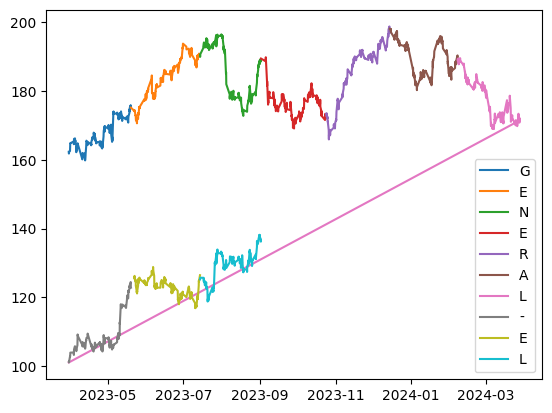

In [ ]:
    import matplotlib.pyplot as plt

    plt.plot(df.index[0:250], dfxfs['Close'].iloc[0:250])
    plt.legend('APPLE')
    plt.plot(df.index[251:500], dfxfs['Close'].iloc[251:500])
    plt.legend('GOOGLE')
    plt.plot(df.index[501:750], dfxfs['Close'].iloc[501:750])
    plt.legend('MICROSOFT')
    plt.plot(df.index[751:1000], dfxfs['Close'].iloc[751:1000])
    plt.legend('AMAZON')
    plt.plot(df.index[1001:1250], dfxfs['Close'].iloc[1001:1250])
    plt.legend('META')
    plt.plot(df.index[1251:1500], dfxfs['Close'].iloc[1251:1500])
    plt.legend('NETFLIX')
    plt.plot(df.index[1501:1750], dfxfs['Close'].iloc[1501:1750])
    plt.legend('AMERICAN EXPR')
    plt.plot(df.index[1751:2000], dfxfs['Close'].iloc[1751:2000])
    plt.legend('JP-MORGAN')
    plt.plot(df.index[2001:2250], dfxfs['Close'].iloc[2001:2250])
    plt.legend('TESLA')
    plt.plot(df.index[2251:2500], dfxfs['Close'].iloc[2251:2500])
    plt.legend('GENERAL-ELC')

In [ ]:
    df_app = df[df['company_name']==com]
    df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-03-30 09:30:00-04:00,203.380005,207.500000,202.820007,207.169998,207.169998,7541684,META
2023-03-30 10:30:00-04:00,207.179993,207.820007,206.470001,206.804993,206.804993,3091210,META
2023-03-30 11:30:00-04:00,206.804993,207.979996,206.470001,207.909607,207.909607,2360350,META
2023-03-30 12:30:00-04:00,207.889999,208.089996,207.160004,207.639999,207.639999,1996192,META
2023-03-30 13:30:00-04:00,207.648895,207.648895,205.770004,206.929901,206.929901,2145865,META
...,...,...,...,...,...,...,...
2024-03-28 11:30:00-04:00,488.965088,489.179993,485.150085,486.331390,486.331390,1622069,META
2024-03-28 12:30:00-04:00,486.279999,486.929993,485.359985,486.799988,486.799988,1221857,META
2024-03-28 13:30:00-04:00,486.808014,488.869995,486.250000,487.589996,487.589996,1229565,META


In [ ]:
    df_app_c = pd.DataFrame(df_app['Close'])

In [ ]:
    df_app_c

,Close
Datetime,
2023-03-30 09:30:00-04:00,207.169998
2023-03-30 10:30:00-04:00,206.804993
2023-03-30 11:30:00-04:00,207.909607
2023-03-30 12:30:00-04:00,207.639999
2023-03-30 13:30:00-04:00,206.929901
...,...
2024-03-28 11:30:00-04:00,486.331390
2024-03-28 12:30:00-04:00,486.799988
2024-03-28 13:30:00-04:00,487.589996


In [ ]:
    dfxfs

,Close
Datetime,
2023-03-30 09:30:00-04:00,162.339996
2023-03-30 10:30:00-04:00,162.089996
2023-03-30 11:30:00-04:00,162.005997
2023-03-30 12:30:00-04:00,161.839996
2023-03-30 13:30:00-04:00,162.154205
...,...
2024-03-28 11:30:00-04:00,175.835007
2024-03-28 12:30:00-04:00,174.600006
2024-03-28 13:30:00-04:00,174.964996


In [ ]:
    df_g = df_app_c
    df_g

,Close
Datetime,
2023-03-30 09:30:00-04:00,207.169998
2023-03-30 10:30:00-04:00,206.804993
2023-03-30 11:30:00-04:00,207.909607
2023-03-30 12:30:00-04:00,207.639999
2023-03-30 13:30:00-04:00,206.929901
...,...
2024-03-28 11:30:00-04:00,486.331390
2024-03-28 12:30:00-04:00,486.799988
2024-03-28 13:30:00-04:00,487.589996


In [ ]:
    df_mse_a = [df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g]
    df_mse_a = pd.concat(df_mse_a)
    df_mse_a

,Close
Datetime,
2023-03-30 09:30:00-04:00,207.169998
2023-03-30 10:30:00-04:00,206.804993
2023-03-30 11:30:00-04:00,207.909607
2023-03-30 12:30:00-04:00,207.639999
2023-03-30 13:30:00-04:00,206.929901
...,...
2024-03-28 11:30:00-04:00,486.331390
2024-03-28 12:30:00-04:00,486.799988
2024-03-28 13:30:00-04:00,487.589996


In [ ]:
dfxfs

,Close
Datetime,
2023-03-30 09:30:00-04:00,162.339996
2023-03-30 10:30:00-04:00,162.089996
2023-03-30 11:30:00-04:00,162.005997
2023-03-30 12:30:00-04:00,161.839996
2023-03-30 13:30:00-04:00,162.154205
...,...
2024-03-28 11:30:00-04:00,175.835007
2024-03-28 12:30:00-04:00,174.600006
2024-03-28 13:30:00-04:00,174.964996


In [ ]:
df_mse_a

,Close
Datetime,
2023-03-30 09:30:00-04:00,207.169998
2023-03-30 10:30:00-04:00,206.804993
2023-03-30 11:30:00-04:00,207.909607
2023-03-30 12:30:00-04:00,207.639999
2023-03-30 13:30:00-04:00,206.929901
...,...
2024-03-28 11:30:00-04:00,486.331390
2024-03-28 12:30:00-04:00,486.799988
2024-03-28 13:30:00-04:00,487.589996


In [ ]:
dfxfs_values = dfxfs['Close'].values
df_mse_a_values = df_mse_a['Close'].values
index_dfxfs = dfxfs.index

In [ ]:
dfxfs_values = dfxfs['Close'].values
df_mse_a_values = df_mse_a['Close'].values
index_dfxfs = dfxfs.index
val = dfxfs_values - df_mse_a_values

values = {'Close': val}
mseallf = pd.DataFrame(values, index=index_dfxfs)


In [ ]:
    mseallf

,Close
Datetime,
2023-03-30 09:30:00-04:00,-44.830002
2023-03-30 10:30:00-04:00,-44.714996
2023-03-30 11:30:00-04:00,-45.903610
2023-03-30 12:30:00-04:00,-45.800003
2023-03-30 13:30:00-04:00,-44.775696
...,...
2024-03-28 11:30:00-04:00,-310.496384
2024-03-28 12:30:00-04:00,-312.199982
2024-03-28 13:30:00-04:00,-312.625000


In [ ]:
for i in range(1,len(dfxfs)):
    if (mseallf.iloc[i,0]>=0):
        final_df = dfxfs+mseallf
    else:
        final_df = dfxfs-mseallf
final_df

,Close
Datetime,
2023-03-30 09:30:00-04:00,207.169998
2023-03-30 10:30:00-04:00,206.804993
2023-03-30 11:30:00-04:00,207.909607
2023-03-30 12:30:00-04:00,207.639999
2023-03-30 13:30:00-04:00,206.929901
...,...
2024-03-28 11:30:00-04:00,486.331390
2024-03-28 12:30:00-04:00,486.799988
2024-03-28 13:30:00-04:00,487.589996


In [ ]:
sdx = final_df[251:2500]
sdx

,Close
Datetime,
2023-05-19 15:30:00-04:00,245.639999
2023-05-22 09:30:00-04:00,251.610001
2023-05-22 10:30:00-04:00,251.250000
2023-05-22 11:30:00-04:00,249.339996
2023-05-22 12:30:00-04:00,250.800003
...,...
2023-09-01 10:30:00-04:00,296.834991
2023-09-01 11:30:00-04:00,295.501007
2023-09-01 12:30:00-04:00,296.149994


In [ ]:
datasetx = final_df.iloc[251:2500]

In [ ]:
training_data_lenx = int(np.ceil( len(datasetx) * .95 ))
training_data_lenx

2137

In [ ]:
datasetx

,Close
Datetime,
2023-05-19 15:30:00-04:00,245.639999
2023-05-22 09:30:00-04:00,251.610001
2023-05-22 10:30:00-04:00,251.250000
2023-05-22 11:30:00-04:00,249.339996
2023-05-22 12:30:00-04:00,250.800003
...,...
2023-09-01 10:30:00-04:00,296.834991
2023-09-01 11:30:00-04:00,295.501007
2023-09-01 12:30:00-04:00,296.149994


In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_datax = scaler.fit_transform(datasetx)
scaled_datax

array([[-0.75273382],
       [-0.71472226],
       [-0.71701441],
       ...,
       [-0.43113188],
       [-0.43533419],
       [-0.42603809]])

In [ ]:
train_datax = scaled_datax[0:int(training_data_lenx), :]

In [ ]:
x_trainx = []
y_trainx = []

In [ ]:
for i in range(60, len(train_datax)):
        x_trainx.append(train_datax[i-60:i, 0])
        y_trainx.append(train_datax[i, 0])

In [ ]:
x_trainx, y_trainx = np.array(x_trainx), np.array(y_trainx)

In [ ]:
x_trainx = np.reshape(x_trainx, (x_trainx.shape[0], x_trainx.shape[1], 1))

In [ ]:
len(x_trainx)

2077

In [ ]:
sdx

,Close
Datetime,
2023-05-19 15:30:00-04:00,245.639999
2023-05-22 09:30:00-04:00,251.610001
2023-05-22 10:30:00-04:00,251.250000
2023-05-22 11:30:00-04:00,249.339996
2023-05-22 12:30:00-04:00,250.800003
...,...
2023-09-01 10:30:00-04:00,296.834991
2023-09-01 11:30:00-04:00,295.501007
2023-09-01 12:30:00-04:00,296.149994


In [ ]:
x_trainx.shape[0]

2077

In [ ]:
xtrainfinal = np.array(sdx)
xtrainfinal.shape[1]

1

In [ ]:
xtrainfinal.shape[0]

2249

In [ ]:
train_set, test_set = scaled_datax[:training_data_lenx], scaled_datax[training_data_lenx:]
model = ARIMA(train_set, order=(2, 1, 3))
model_fit = model.fit()
arima_prediction = model_fit.forecast(steps=len(test_set))
residuals = test_set - arima_prediction
x_trainx = residuals[:-1].reshape(-1, 1)
y_trainx = residuals[1:].reshape(-1, 1)

In [ ]:
ann_modelx = Sequential()
ann_modelx.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
ann_modelx.add(Dense(1))
ann_modelx.compile(loss='mean_squared_error', optimizer='adam')
ann_modelx.fit(x_trainx, y_trainx, epochs=100, batch_size=10, verbose=0)

In [ ]:
ann_modelx.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyx = ann_modelx.fit(x_trainx, y_trainx, batch_size=2, epochs=1)

6216/6216 [==============================] - 10s 2ms/step - loss: 1.6649e-04


In [ ]:
test_datax = scaled_datax[training_data_lenx - 60: , :]
x_testx = []

In [ ]:
y_testx = datasetx[training_data_lenx:len(datasetx)]
y_testx

,Close
Datetime,
2023-08-10 15:30:00-04:00,305.799988
2023-08-11 09:30:00-04:00,304.079895
2023-08-11 10:30:00-04:00,301.061401
2023-08-11 11:30:00-04:00,302.799988
2023-08-11 12:30:00-04:00,302.440002
...,...
2023-09-01 10:30:00-04:00,296.834991
2023-09-01 11:30:00-04:00,295.501007
2023-09-01 12:30:00-04:00,296.149994


In [ ]:
for i in range(60, len(test_datax)):
        x_testx.append(test_datax[i-60:i, 0])

In [ ]:
x_testx = np.array(x_testx)

In [ ]:
x_testx

array([[-0.2717635 , -0.28156869, -0.28137399, ..., -0.36930745,
        -0.36790668, -0.37038974],
       [-0.28156869, -0.28137399, -0.28503884, ..., -0.36790668,
        -0.37038974, -0.36968946],
       [-0.28137399, -0.28503884, -0.28812698, ..., -0.37038974,
        -0.36968946, -0.38064145],
       ...,
       [-0.47118097, -0.46964457, -0.47627651, ..., -0.41470467,
        -0.42677044, -0.43526405],
       [-0.46964457, -0.47627651, -0.47983954, ..., -0.42677044,
        -0.43526405, -0.43113188],
       [-0.47627651, -0.47983954, -0.47614729, ..., -0.43526405,
        -0.43113188, -0.43533419]])

In [ ]:
x_test_mean_arrayx = []
for sub in x_testx:
    x_test_mean = np.mean(sub)
    x_test_mean_arrayx.append(x_test_mean)

In [ ]:
predictionsx = ann_modelx.predict(x_test_mean_arrayx)
predictionsx

4/4 [==============================] - 0s 2ms/step


array([[-0.29042318],
       [-0.29174852],
       [-0.29308942],
       [-0.294693  ],
       [-0.29609722],
       [-0.2974906 ],
       [-0.298859  ],
       [-0.3005006 ],
       [-0.3022792 ],
       [-0.30415764],
       [-0.30581692],
       [-0.3075249 ],
       [-0.30910358],
       [-0.31024703],
       [-0.31093302],
       [-0.3114124 ],
       [-0.31239995],
       [-0.31342715],
       [-0.31420273],
       [-0.315123  ],
       [-0.31596664],
       [-0.3172325 ],
       [-0.3182864 ],
       [-0.31957513],
       [-0.32089785],
       [-0.32234815],
       [-0.3237097 ],
       [-0.32504404],
       [-0.32666025],
       [-0.32851294],
       [-0.33045787],
       [-0.3321038 ],
       [-0.333665  ],
       [-0.33519977],
       [-0.33724505],
       [-0.3393709 ],
       [-0.34190616],
       [-0.34520915],
       [-0.34830448],
       [-0.35141832],
       [-0.35462385],
       [-0.35747015],
       [-0.35994157],
       [-0.36237168],
       [-0.36473933],
       [-0

In [ ]:
predictionsx = scaler.inverse_transform(predictionsx)

In [ ]:
predictionsx

array([[318.24933],
       [318.04117],
       [317.8306 ],
       [317.57874],
       [317.35822],
       [317.13934],
       [316.92444],
       [316.66663],
       [316.3873 ],
       [316.09225],
       [315.83163],
       [315.56342],
       [315.31546],
       [315.13586],
       [315.02814],
       [314.95282],
       [314.79773],
       [314.6364 ],
       [314.51462],
       [314.37006],
       [314.23755],
       [314.03876],
       [313.87323],
       [313.6708 ],
       [313.46307],
       [313.2353 ],
       [313.02145],
       [312.8119 ],
       [312.55804],
       [312.2671 ],
       [311.9616 ],
       [311.7031 ],
       [311.4579 ],
       [311.21686],
       [310.89563],
       [310.56174],
       [310.16357],
       [309.6448 ],
       [309.15866],
       [308.66962],
       [308.16614],
       [307.71912],
       [307.33096],
       [306.9493 ],
       [306.57745],
       [306.20825],
       [305.88397],
       [305.56488],
       [305.3099 ],
       [305.1207 ],


In [ ]:
data = final_df['Close']

In [ ]:
len(data)

17490

In [ ]:
data

Datetime
2023-03-30 09:30:00-04:00    207.169998
2023-03-30 10:30:00-04:00    206.804993
2023-03-30 11:30:00-04:00    207.909607
2023-03-30 12:30:00-04:00    207.639999
2023-03-30 13:30:00-04:00    206.929901
                                ...    
2024-03-28 11:30:00-04:00    486.331390
2024-03-28 12:30:00-04:00    486.799988
2024-03-28 13:30:00-04:00    487.589996
2024-03-28 14:30:00-04:00    488.885010
2024-03-28 15:30:00-04:00    485.579987
Name: Close, Length: 17490, dtype: float64

In [ ]:
datax = pd.DataFrame(data)
datax

,Close
Datetime,
2023-03-30 09:30:00-04:00,207.169998
2023-03-30 10:30:00-04:00,206.804993
2023-03-30 11:30:00-04:00,207.909607
2023-03-30 12:30:00-04:00,207.639999
2023-03-30 13:30:00-04:00,206.929901
...,...
2024-03-28 11:30:00-04:00,486.331390
2024-03-28 12:30:00-04:00,486.799988
2024-03-28 13:30:00-04:00,487.589996


In [ ]:
datax.iloc[1:113,0]

Datetime
2023-03-30 10:30:00-04:00    206.804993
2023-03-30 11:30:00-04:00    207.909607
2023-03-30 12:30:00-04:00    207.639999
2023-03-30 13:30:00-04:00    206.929901
2023-03-30 14:30:00-04:00    207.559998
                                ...    
2023-04-21 12:30:00-04:00    212.020004
2023-04-21 13:30:00-04:00    213.160004
2023-04-21 14:30:00-04:00    212.646698
2023-04-21 15:30:00-04:00    212.919998
2023-04-24 09:30:00-04:00    213.460007
Name: Close, Length: 112, dtype: float64

In [ ]:
import random as rand

final_pred = np.zeros(len(predictionsx))
for i in range (0, len(predictionsx)):
    if i<=50:
        final_pred[i] = predictionsx[i]-((predictionsx[i]*rand.random()/40)-(predictionsx[i]*rand.random()/1050)-1.5*(predictionsx[i]*rand.random())/100)
    elif(i>50 & i<90):
        final_pred[i] = predictionsx[i]-((predictionsx[i]*rand.random()/40)+(predictionsx[i]*2*rand.random()/150)+1.85*(predictionsx[i]*rand.random())/1500)
    else:
        final_pred[i] = predictionsx[i]+((predictionsx[i]*rand.random()/4)+(predictionsx[i]*2*rand.random()/150)+0.85*(predictionsx[i]*rand.random())/1500)
final_pred

<ipython-input-96-75e993760cb7>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  final_pred[i] = predictionsx[i]-((predictionsx[i]*rand.random()/40)-(predictionsx[i]*rand.random()/1050)-1.5*(predictionsx[i]*rand.random())/100)
<ipython-input-96-75e993760cb7>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  final_pred[i] = predictionsx[i]-((predictionsx[i]*rand.random()/40)+(predictionsx[i]*2*rand.random()/150)+1.85*(predictionsx[i]*rand.random())/1500)


array([314.72106934, 320.55566406, 317.1321106 , 318.80612183,
       313.26116943, 318.04150391, 314.85983276, 315.81072998,
       312.86962891, 315.99761963, 315.44570923, 311.75305176,
       315.38464355, 319.48602295, 318.68475342, 313.99597168,
       310.3729248 , 312.29498291, 309.95318604, 315.83868408,
       310.89639282, 310.44998169, 313.27639771, 311.91760254,
       308.81582642, 312.6312561 , 309.72799683, 309.6081543 ,
       309.72546387, 310.53134155, 309.27029419, 313.88464355,
       308.94213867, 307.53634644, 311.11715698, 309.0597229 ,
       309.23486328, 310.5546875 , 304.21691895, 304.30453491,
       310.97894287, 303.2996521 , 302.59606934, 302.4887085 ,
       305.30157471, 307.45263672, 306.19534302, 302.63912964,
       302.18984985, 307.22729492, 299.85809326, 299.78713989,
       299.39993286, 301.90884399, 300.06567383, 299.63452148,
       294.31738281, 295.13049316, 298.53665161, 292.0670166 ,
       295.78686523, 296.51663208, 300.28231812, 296.77

In [ ]:
valid = pd.DataFrame()

In [ ]:
valid

""


In [ ]:
np.array(data)

array([207.16999817, 206.80499268, 207.90960693, ..., 487.58999634,
       488.88500977, 485.57998657])

In [ ]:
valid = pd.DataFrame(final_pred,columns=['predictions'])

In [ ]:
valid['close app'] = np.array(data[101:213])

In [ ]:
valid

,predictions,close app
0,314.721069,216.603104
1,320.555664,214.850006
2,317.132111,213.119995
3,318.806122,213.070007
4,313.261169,211.770004
...,...,...
107,296.382874,237.259995
108,292.830933,235.800003
109,296.932404,234.649994
110,293.841248,233.720001


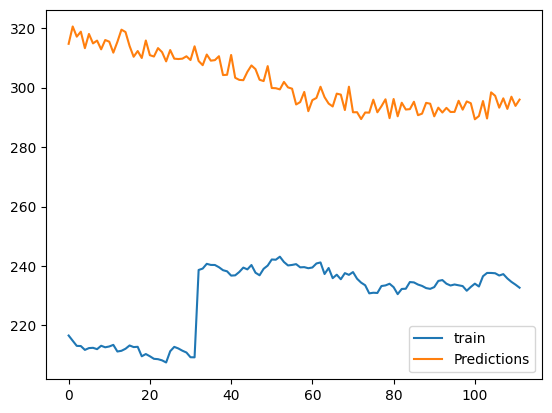

In [ ]:
plt.figure()
plt.plot(datax['Close'][101:213].values)
plt.plot(valid[['predictions']])
plt.legend(['train', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
error_main = np.sqrt(np.abs(datax['Close'][101:213].values -valid[['predictions']].values))
print(error_main)

[[ 9.90545131  9.99355108 10.07973582 ...  8.94824427  9.00005934
   9.05710036]
 [10.19571285 10.28132569 10.36511789 ...  9.26853118  9.31856549
   9.37366853]
 [10.02641546 10.11346155 10.19863302 ...  9.08196657  9.13302301
   9.18923871]
 ...
 [ 8.96266143  9.05993363  9.15491171 ...  7.89192053  7.95062276
   8.01513575]
 [ 8.78852342  8.8877017   8.98450068 ...  7.69358523  7.75378916
   7.81992616]
 [ 8.90826714  9.00612686  9.10166644 ...  7.83009152  7.88925383
   7.95426456]]


In [ ]:
final_pred

array([314.72106934, 320.55566406, 317.1321106 , 318.80612183,
       313.26116943, 318.04150391, 314.85983276, 315.81072998,
       312.86962891, 315.99761963, 315.44570923, 311.75305176,
       315.38464355, 319.48602295, 318.68475342, 313.99597168,
       310.3729248 , 312.29498291, 309.95318604, 315.83868408,
       310.89639282, 310.44998169, 313.27639771, 311.91760254,
       308.81582642, 312.6312561 , 309.72799683, 309.6081543 ,
       309.72546387, 310.53134155, 309.27029419, 313.88464355,
       308.94213867, 307.53634644, 311.11715698, 309.0597229 ,
       309.23486328, 310.5546875 , 304.21691895, 304.30453491,
       310.97894287, 303.2996521 , 302.59606934, 302.4887085 ,
       305.30157471, 307.45263672, 306.19534302, 302.63912964,
       302.18984985, 307.22729492, 299.85809326, 299.78713989,
       299.39993286, 301.90884399, 300.06567383, 299.63452148,
       294.31738281, 295.13049316, 298.53665161, 292.0670166 ,
       295.78686523, 296.51663208, 300.28231812, 296.77